# Reincidencia en Desnutrición

## Configuración inicial

### Librerías de Tratamiento de datos

In [0]:
import numpy as np
import pandas as pd

### Librerías de Gráficos

In [0]:
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

### Configuraciones adicionales

In [0]:
# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Cargue de los datos

In [0]:
# data_modelo = spark.sql("select * from dbo.baseModelo")# base a lo ancho
data_modelo = spark.sql("select * from dbo.baseModelo_t1") # base a lo largo
display(data_modelo)

AnioToma NoToma RegimenSeguridadSocial Toma IdDireccionesICBF DireccionICBF NombreServicio IdBeneficiario FechaNacimientoBeneficiario EdadBeneficiarioDias EdadBeneficiarioMeses EdadBeneficiarioAnios SemanasBeneficiario CodDocumento NumeroDocumento PrimerNombre SegundoNombre PrimerApellido SegundoApellido tipobeneficiario sexo NombreSexo EdadMesesBenAlaTomaNut CodPaisNacimientoBeneficiario NombPaisNacimientoBeneficiario CodPaisRasidenciaBen NombPaisRasidenciaBen CodDepartamentoResidenciaBen NomDepartamentoResidenciaBen CodMunicipResidenciaBen NomMunicipResidenciaBen CodComunaResidenciaBen NomComunaResidenciaBen CodBarrioResidenciaBen NomBarrioResidenciaBen CodVeredaResidenciaBen NomVeredaResidenciaBen CodRancheriaResidenciaBen NomRancheriaResidenciaBen PresentaDiscapacidad ZonaUbicacionBeneficiario GrupoEtnico MesesLactanciaMaternaExclusiva MesesLactanciaMaternaTotal PesoBeneficiarioAlNacer TallaBeneficiarioAlNacer AntecendentePremadurez EdadGestacionarAlNacer FechaValoracionNuricional FechaMedicionPerimetroBraquial MedicionPerimetroBraquial peso Talla ZScoreTallaEdad ZScorePesoEdad ZScorePesoTalla ZScoreIMC EstadoTallaEdad EstadoPesoEdad EstadoPesoTalla EstadoIMC Flag FechaRegistroSaludNutricion PresentaCarneVacunacion ControlesCrecimDesarrollo 2020 1 AFILIADO REGIMEN SUBSIDIADO 20202 1 Dirección de Primera Infancia DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - FAMILIAR 667112 2016-11-30 1181 39.0 4 > 40 Semanas RC 1116809884 KENIA NAYENCY BLANCO USCATEGUI NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES M Mujer 39 170 Colombia 170 Colombia 81 Arauca 81001 Arauca null null null null OTRO OTRO null null null RESTO NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 6 12 null null 0 2020-02-24T00:00:00.000+0000 2020-02-24T00:00:00.000+0000 15.8 12.20 90.00 -1.77 -1.29 -0.41 -0.22 Riesgo de baja talla Riesgo de peso bajo para la edad Peso adecuado para la talla Adecuado para la edad 0 2020-03-05T13:16:13.543+0000 S 1 2020 1 AFILIADO REGIMEN SUBSIDIADO 20203 1 Dirección de Primera Infancia DESARROLLO INFANTIL EN MEDIO FAMILIAR CON ARRIENDO - FAMILIAR 2205184 2015-08-14 1671 56.0 5 > 40 Semanas RC 1052188599 DIDIER ESTRADA SANCHEZ NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES H Hombre 55 170 Colombia 170 Colombia 13 Bolívar 13042 Arenal null null null null null null null null null CABECERA NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 6 6 null null 0 2020-03-11T00:00:00.000+0000 2020-03-11T00:00:00.000+0000 16.0 15.60 100.00 -1.61 -0.88 0.19 0.27 Riesgo de baja talla Peso adecuado para la edad Peso adecuado para la talla Adecuado para la edad 0 2020-03-26T17:55:53.657+0000 S 1 2021 1 AFILIADO REGIMEN SUBSIDIADO 20213 1 Dirección de Primera Infancia HCB FAMI - FAMILIAR 3500452 2020-03-30 358 12.0 1 > 40 Semanas RC 1073183012 IAN MATEO PERFEZ DIAZ NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES H Hombre 12 170 Colombia 170 Colombia 15 Boyacá 15757 Socha null null null null null null null null null CABECERA NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 6 12 null null N 0 2021-03-23T00:00:00.000+0000 2021-03-23T00:00:00.000+0000 14.5 8.80 70.00 -2.31 -0.79 0.53 0.80 Retraso en talla Peso adecuado para la edad Peso adecuado para la talla Adecuado para la edad 0 2021-04-11T16:21:19.570+0000 S 0 2021 2 AFILIADO REGIMEN SUBSIDIADO 20217 1 Dirección de Primera Infancia HCB FAMI - FAMILIAR 3500452 2020-03-30 480 16.0 1 > 40 Semanas RC 1073183012 IAN MATEO PERFEZ DIAZ NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES H Hombre 16 170 Colombia 170 Colombia 15 Boyacá 15757 Socha null null null null null null null null null CABECERA NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 6 12 null null N 0 2021-07-23T00:00:00.000+0000 2021-03-23T00:00:00.000+0000 14.5 9.70 76.00 -1.54 -0.70 0.00 0.33 Riesgo de baja talla Peso adecuado para la edad Peso adecuado para la talla Adecuado para la edad 0 2021-07-25T15:31:17.450+0000 S 0 2021 1 AFILIADO REGIMEN SUBSIDIADO 20212 1 Dirección de Primera Infancia DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRIENDO - F

In [0]:
%sql
select count (1) from dbo.baseModelo_t1

count(1) 199674

In [0]:
data = data_modelo.toPandas()

## Descriptivo inicial

In [0]:
data.shape

Out[6]: (199674, 65)

In [0]:
data.columns

Out[7]: Index(['AnioToma', 'NoToma', 'RegimenSeguridadSocial', 'Toma',
 'IdDireccionesICBF', 'DireccionICBF', 'NombreServicio',
 'IdBeneficiario', 'FechaNacimientoBeneficiario', 'EdadBeneficiarioDias',
 'EdadBeneficiarioMeses', 'EdadBeneficiarioAnios', 'SemanasBeneficiario',
 'CodDocumento', 'NumeroDocumento', 'PrimerNombre', 'SegundoNombre',
 'PrimerApellido', 'SegundoApellido', 'tipobeneficiario', 'sexo',
 'NombreSexo', 'EdadMesesBenAlaTomaNut', 'CodPaisNacimientoBeneficiario',
 'NombPaisNacimientoBeneficiario', 'CodPaisRasidenciaBen',
 'NombPaisRasidenciaBen', 'CodDepartamentoResidenciaBen',
 'NomDepartamentoResidenciaBen', 'CodMunicipResidenciaBen',
 'NomMunicipResidenciaBen', 'CodComunaResidenciaBen',
 'NomComunaResidenciaBen', 'CodBarrioResidenciaBen',
 'NomBarrioResidenciaBen', 'CodVeredaResidenciaBen',
 'NomVeredaResidenciaBen', 'CodRancheriaResidenciaBen',
 'NomRancheriaResidenciaBen', 'PresentaDiscapacidad',
 'ZonaUbicacionBeneficiario', 'GrupoEtnico',
 'MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal',
 'PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer',
 'AntecendentePremadurez', 'EdadGestacionarAlNacer',
 'FechaValoracionNuricional', 'FechaMedicionPerimetroBraquial',
 'MedicionPerimetroBraquial', 'peso', 'Talla', 'ZScoreTallaEdad',
 'ZScorePesoEdad', 'ZScorePesoTalla', 'ZScoreIMC', 'EstadoTallaEdad',
 'EstadoPesoEdad', 'EstadoPesoTalla', 'EstadoIMC', 'Flag',
 'FechaRegistroSaludNutricion', 'PresentaCarneVacunacion',
 'ControlesCrecimDesarrollo'],
 dtype='object')

In [0]:
data.head(5)

Out[8]:

AnioToma 
 NoToma 
 RegimenSeguridadSocial 
 Toma 
 IdDireccionesICBF 
 DireccionICBF 
 NombreServicio 
 IdBeneficiario 
 FechaNacimientoBeneficiario 
 EdadBeneficiarioDias 
 EdadBeneficiarioMeses 
 EdadBeneficiarioAnios 
 SemanasBeneficiario 
 CodDocumento 
 NumeroDocumento 
 PrimerNombre 
 SegundoNombre 
 PrimerApellido 
 SegundoApellido 
 tipobeneficiario 
 sexo 
 NombreSexo 
 EdadMesesBenAlaTomaNut 
 CodPaisNacimientoBeneficiario 
 NombPaisNacimientoBeneficiario 
 CodPaisRasidenciaBen 
 NombPaisRasidenciaBen 
 CodDepartamentoResidenciaBen 
 NomDepartamentoResidenciaBen 
 CodMunicipResidenciaBen 
 NomMunicipResidenciaBen 
 CodComunaResidenciaBen 
 NomComunaResidenciaBen 
 CodBarrioResidenciaBen 
 NomBarrioResidenciaBen 
 CodVeredaResidenciaBen 
 NomVeredaResidenciaBen 
 CodRancheriaResidenciaBen 
 NomRancheriaResidenciaBen 
 PresentaDiscapacidad 
 ZonaUbicacionBeneficiario 
 GrupoEtnico 
 MesesLactanciaMaternaExclusiva 
 MesesLactanciaMaternaTotal 
 PesoBeneficiarioAlNacer 
 TallaBeneficiarioAlNacer 
 AntecendentePremadurez 
 EdadGestacionarAlNacer 
 FechaValoracionNuricional 
 FechaMedicionPerimetroBraquial 
 MedicionPerimetroBraquial 
 peso 
 Talla 
 ZScoreTallaEdad 
 ZScorePesoEdad 
 ZScorePesoTalla 
 ZScoreIMC 
 EstadoTallaEdad 
 EstadoPesoEdad 
 EstadoPesoTalla 
 EstadoIMC 
 Flag 
 FechaRegistroSaludNutricion 
 PresentaCarneVacunacion 
 ControlesCrecimDesarrollo 
 
 
 
 
 0 
 2021 
 2 
 AFILIADO REGIMEN SUBSIDIADO 
 20217 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 18894959 
 2019-09-21 
 661 
 22.0 
 2 
 > 40 Semanas 
 RC 
 1101464994 
 LUIS 
 ALEJANDRO 
 BERRIO 
 SILGADO 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 22 
 170 
 Colombia 
 170 
 Colombia 
 70 
 Sucre 
 70713 
 San Onofre 
 None 
 None 
 None 
 None 
 70713007 
 BERRUGAS 
 NaN 
 None 
 None 
 RESTO 
 AFROCOLOMBIANO 
 6 
 6 
 None 
 None 
 N 
 0 
 2021-07-13 
 2021-07-13 
 15.0 
 12.60 
 83.00 
 -0.96 
 0.66 
 1.56 
 1.75 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Riesgo de Sobrepeso 
 Riesgo de Sobrepeso 
 0 
 2021-07-21 17:53:42.563 
 S 
 1 
 
 
 1 
 2021 
 1 
 AFILIADO REGIMEN SUBSIDIADO 
 20212 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 18895045 
 2019-10-24 
 489 
 16.0 
 2 
 > 40 Semanas 
 RC 
 1093929471 
 WILMER 
 EDUARDO 
 DIAZ 
 MEJIA 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 17 
 170 
 Colombia 
 170 
 Colombia 
 54 
 Norte De Santander 
 54810 
 Tibu 
 None 
 None 
 None 
 None 
 OTRO 
 OTRO 
 NaN 
 None 
 None 
 RESTO 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 6 
 7 
 None 
 None 
 N 
 0 
 2021-02-24 
 2021-02-24 
 16.0 
 11.00 
 80.00 
 -0.11 
 0.39 
 0.61 
 0.64 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Adecuado para la edad 
 0 
 2021-02-27 20:49:59.567 
 S 
 1 
 
 
 2 
 2021 
 2 
 AFILIADO REGIMEN SUBSIDIADO 
 20217 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 18895045 
 2019-10-24 
 639 
 21.0 
 2 
 > 40 Semanas 
 RC 
 1093929471 
 WILMER 
 EDUARDO 
 DIAZ 
 MEJIA 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 21 
 170 
 Colombia 
 170 
 Colombia 
 54 
 Norte De Santander 
 54810 
 Tibu 
 None 
 None 
 None 
 None 
 OTRO 
 OTRO 
 NaN 
 None 
 None 
 RESTO 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 6 
 7 
 None 
 None 
 N 
 0 
 2021-07-24 
 2021-02-24 
 16.0 
 11.70 
 82.00 
 -1.09 
 0.12 
 0.92 
 1.12 
 Riesgo de baja talla 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Riesgo de Sobrepeso 
 0 
 2021-07-27 02:26:18.993 
 S 
 2 
 
 
 3 
 2021 
 3 
 AFILIADO REGIMEN SUBSIDIADO 
 202111 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 18895045 
 2019-10-24 
 743 
 25.0 
 2 
 > 40 Semanas 
 RC 
 1093929471 
 WILMER 
 EDUARDO 
 DIAZ 
 MEJIA 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 25 
 170 
 Col

#### Número de datos ausentes por variable

In [0]:
CRO.isna().sum().sort_values(ascending = False)[0:30]

## Construcción de base inicial

In [0]:
# construir un dataframe con la información de la última toma disponible por individuo
datos = data.sort_values(by='FechaValoracionNuricional', ascending=False)
datos = datos.drop_duplicates(subset=['IdBeneficiario'], keep='first').reset_index().set_index('IdBeneficiario')
datos = datos.astype(
    {'MesesLactanciaMaternaExclusiva': 'int64', 
     'MesesLactanciaMaternaTotal': 'int64', 
     'PesoBeneficiarioAlNacer': 'float64', 
     'TallaBeneficiarioAlNacer': 'float64', 
     'EdadGestacionarAlNacer': 'int64', 
     'EdadMesesBenAlaTomaNut': 'int64', 
     'MedicionPerimetroBraquial': 'float64', 
     'peso': 'float64', 
     'Talla': 'float64', 
     'ZScoreTallaEdad': 'float64', 
     'ZScorePesoEdad': 'float64', 
     'ZScorePesoTalla': 'float64', 
     'ZScoreIMC': 'float64'
    }
)
columnas_NOsignificativas = ['CodDocumento','NumeroDocumento', 'PrimerNombre', 'SegundoNombre', 'PrimerApellido','SegundoApellido','index']
datos = datos.drop(columns=columnas_NOsignificativas)
datos.head()

Out[11]:

AnioToma 
 NoToma 
 RegimenSeguridadSocial 
 Toma 
 IdDireccionesICBF 
 DireccionICBF 
 NombreServicio 
 FechaNacimientoBeneficiario 
 EdadBeneficiarioDias 
 EdadBeneficiarioMeses 
 EdadBeneficiarioAnios 
 SemanasBeneficiario 
 tipobeneficiario 
 sexo 
 NombreSexo 
 EdadMesesBenAlaTomaNut 
 CodPaisNacimientoBeneficiario 
 NombPaisNacimientoBeneficiario 
 CodPaisRasidenciaBen 
 NombPaisRasidenciaBen 
 CodDepartamentoResidenciaBen 
 NomDepartamentoResidenciaBen 
 CodMunicipResidenciaBen 
 NomMunicipResidenciaBen 
 CodComunaResidenciaBen 
 NomComunaResidenciaBen 
 CodBarrioResidenciaBen 
 NomBarrioResidenciaBen 
 CodVeredaResidenciaBen 
 NomVeredaResidenciaBen 
 CodRancheriaResidenciaBen 
 NomRancheriaResidenciaBen 
 PresentaDiscapacidad 
 ZonaUbicacionBeneficiario 
 GrupoEtnico 
 MesesLactanciaMaternaExclusiva 
 MesesLactanciaMaternaTotal 
 PesoBeneficiarioAlNacer 
 TallaBeneficiarioAlNacer 
 AntecendentePremadurez 
 EdadGestacionarAlNacer 
 FechaValoracionNuricional 
 FechaMedicionPerimetroBraquial 
 MedicionPerimetroBraquial 
 peso 
 Talla 
 ZScoreTallaEdad 
 ZScorePesoEdad 
 ZScorePesoTalla 
 ZScoreIMC 
 EstadoTallaEdad 
 EstadoPesoEdad 
 EstadoPesoTalla 
 EstadoIMC 
 Flag 
 FechaRegistroSaludNutricion 
 PresentaCarneVacunacion 
 ControlesCrecimDesarrollo 
 
 
 IdBeneficiario 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 17587369 
 2021 
 3 
 AFILIADO REGIMEN SUBSIDIADO 
 202111 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR CON ARRI... 
 2018-11-01 
 1113 
 37.0 
 3 
 > 40 Semanas 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 37 
 170 
 Colombia 
 170 
 Colombia 
 17 
 Caldas 
 17486 
 Neira 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 CABECERA 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 6 
 18 
 NaN 
 NaN 
 
 0 
 2021-11-18 
 1900-01-01 
 0.0 
 15.2 
 96.4 
 -0.01 
 0.42 
 0.66 
 0.61 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Adecuado para la edad 
 0 
 2021-11-18 08:38:49.260 
 S 
 1 
 
 
 17546102 
 2021 
 1 
 AFILIADO REGIMEN CONTRIBUTIVO 
 202111 
 1 
 Dirección de Primera Infancia 
 HCB FAMI - FAMILIAR 
 2018-10-16 
 1129 
 38.0 
 3 
 > 40 Semanas 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 38 
 170 
 Colombia 
 170 
 Colombia 
 76 
 Valle Del Cauca 
 76001 
 Cali 
 None 
 None 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 CABECERA 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 6 
 12 
 NaN 
 NaN 
 
 0 
 2021-11-18 
 1900-01-01 
 0.0 
 15.0 
 101.0 
 1.12 
 0.26 
 -0.51 
 -0.72 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Adecuado para la edad 
 0 
 2021-11-18 09:15:40.283 
 S 
 1 
 
 
 20233470 
 2021 
 2 
 AFILIADO REGIMEN SUBSIDIADO 
 202111 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR CON ARRI... 
 2020-07-13 
 493 
 16.0 
 1 
 > 40 Semanas 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 17 
 170 
 Colombia 
 170 
 Colombia 
 11 
 Bogota D.C. 
 11001 
 Bogota, D.C. 
 1100118 
 Localidad Rafael Uribe 
 None 
 None 
 None 
 None 
 NaN 
 None 
 None 
 CABECERA 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 7 
 16 
 NaN 
 NaN 
 S 
 34 
 2021-11-18 
 2021-11-18 
 13.5 
 9.4 
 77.0 
 -0.77 
 -0.80 
 -0.62 
 -0.48 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Adecuado para la edad 
 0 
 2021-11-18 09:50:49.527 
 S 
 3 
 
 
 18866483 
 2021 
 3 
 AFILIADO REGIMEN SUBSIDIADO 
 202111 
 1 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 2019-07-07 
 864 
 29.0 
 2 
 > 40 Semanas 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 M 
 Mujer 
 29 
 170 
 Colombia 
 170 
 Colombia 
 41 
 Huila 
 41807 
 Timana 
 None 
 None 
 None 
 None 
 41807030 
 PIRAGUA 
 NaN 
 None 
 None 
 RESTO 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTE

## Variables cuantitativas

In [0]:
datos.select_dtypes(include=['float64', 'int']).describe()

Out[12]:

EdadBeneficiarioMeses 
 EdadMesesBenAlaTomaNut 
 CodRancheriaResidenciaBen 
 MesesLactanciaMaternaExclusiva 
 MesesLactanciaMaternaTotal 
 PesoBeneficiarioAlNacer 
 TallaBeneficiarioAlNacer 
 EdadGestacionarAlNacer 
 MedicionPerimetroBraquial 
 peso 
 Talla 
 ZScoreTallaEdad 
 ZScorePesoEdad 
 ZScorePesoTalla 
 ZScoreIMC 
 
 
 
 
 count 
 110425.000000 
 110425.000000 
 292.000000 
 110425.000000 
 110425.000000 
 2906.000000 
 2886.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 110425.000000 
 
 
 mean 
 29.855268 
 29.909803 
 1081.239726 
 5.557609 
 11.920489 
 3.259928 
 49.966299 
 0.249581 
 11.541528 
 12.525139 
 86.702075 
 -0.834876 
 -0.161477 
 0.396106 
 0.509286 
 
 
 std 
 14.688998 
 14.478394 
 539.437168 
 1.343565 
 6.437320 
 0.957871 
 3.728775 
 2.919082 
 8.708675 
 2.926752 
 10.965197 
 1.288457 
 0.977432 
 0.967897 
 1.009935 
 
 
 min 
 9.000000 
 9.000000 
 55.000000 
 0.000000 
 0.000000 
 0.500000 
 32.000000 
 0.000000 
 0.000000 
 1.120000 
 0.000000 
 -6.000000 
 -5.810000 
 -4.850000 
 -5.190000 
 
 
 25% 
 17.000000 
 18.000000 
 656.000000 
 6.000000 
 6.000000 
 2.910000 
 49.000000 
 0.000000 
 0.000000 
 10.200000 
 78.000000 
 -1.590000 
 -0.760000 
 -0.220000 
 -0.140000 
 
 
 50% 
 26.000000 
 26.000000 
 1121.000000 
 6.000000 
 12.000000 
 3.155000 
 50.000000 
 0.000000 
 15.000000 
 12.000000 
 85.700000 
 -0.780000 
 -0.160000 
 0.340000 
 0.460000 
 
 
 75% 
 42.000000 
 42.000000 
 1491.000000 
 6.000000 
 15.000000 
 3.500000 
 51.000000 
 0.000000 
 16.000000 
 14.500000 
 95.200000 
 -0.060000 
 0.420000 
 0.930000 
 1.070000 
 
 
 max 
 63.000000 
 59.000000 
 2033.000000 
 8.000000 
 60.000000 
 10.000000 
 70.000000 
 38.000000 
 1705.000000 
 32.000000 
 126.000000 
 6.000000 
 4.880000 
 5.000000 
 5.930000

In [0]:
# Gráfico de distribución para cada variable numérica

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

### Correlación variables numéricas

#### ZScorePesoTalla

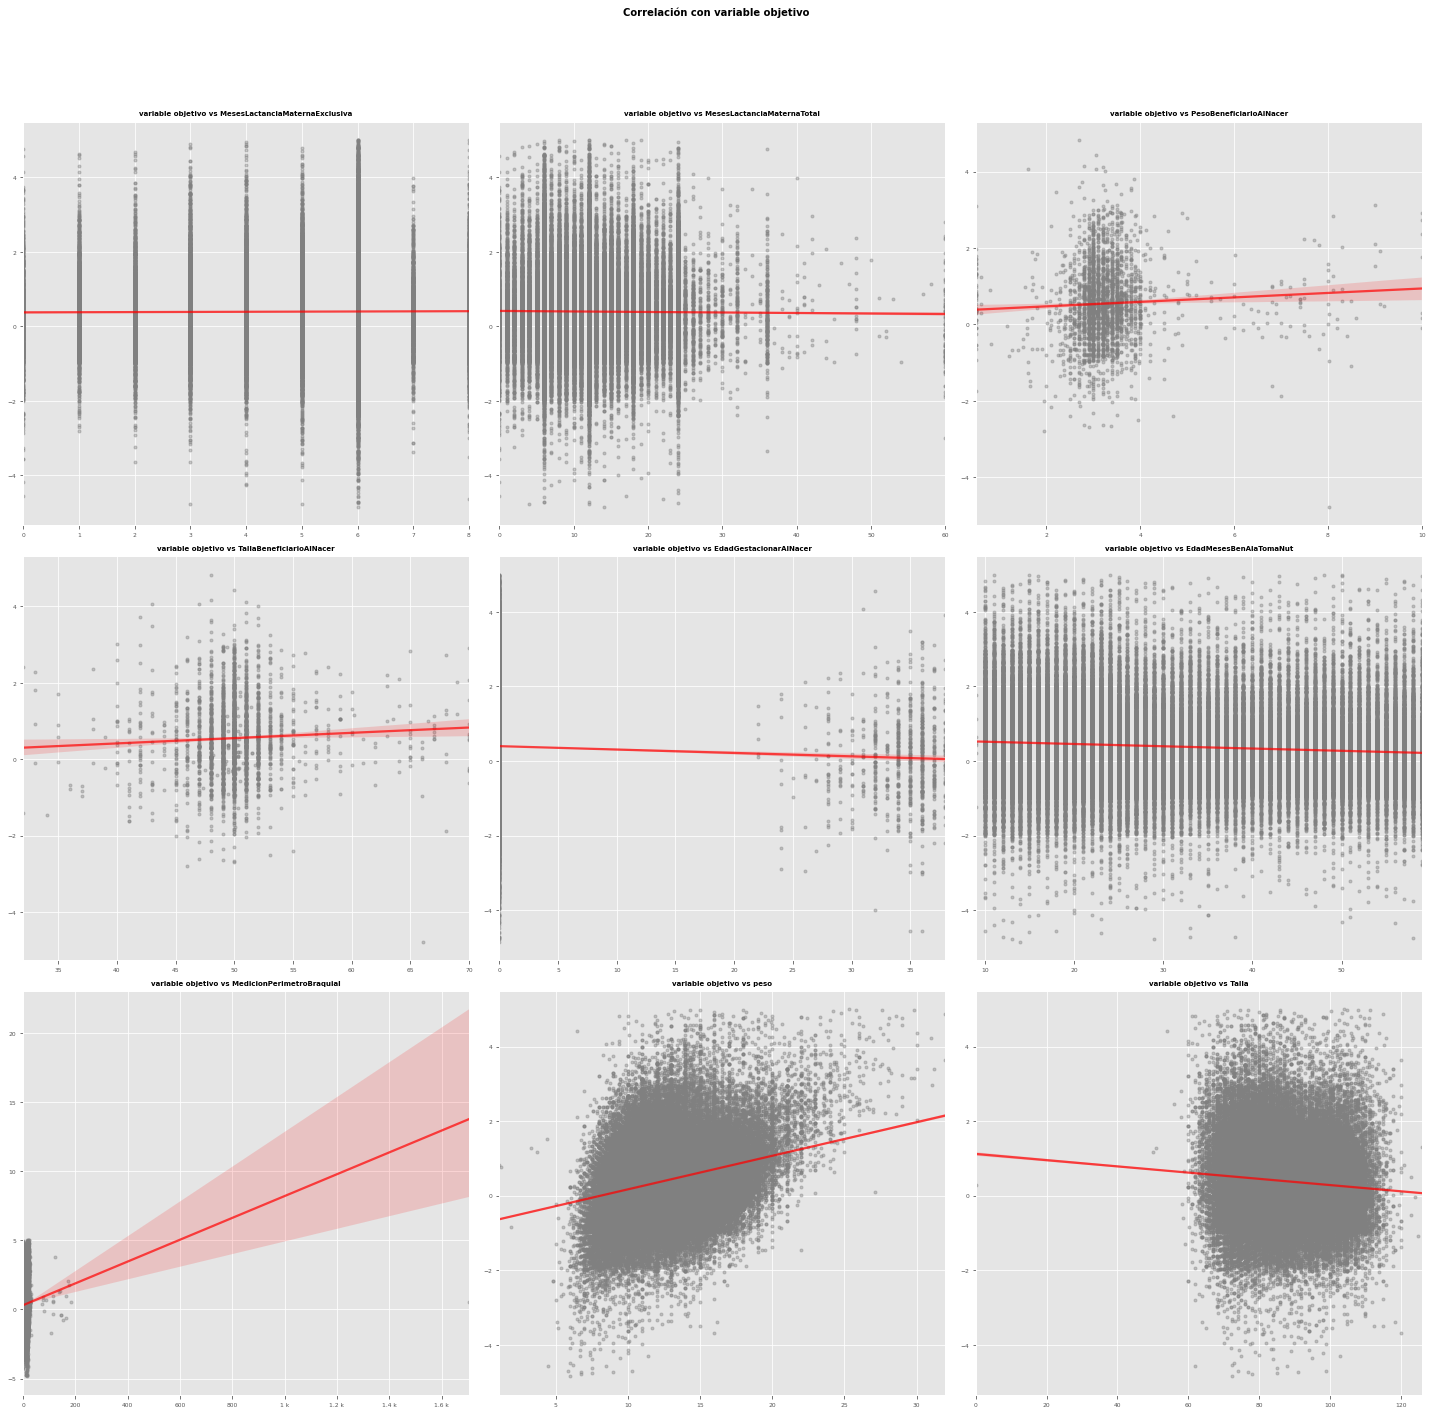

In [0]:
# Gráfico de distribución para cada variable numérica
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoTalla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_viz.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos_viz[colum],
        y           = datos_viz['Y'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"variable objetivo vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con variable objetivo', fontsize = 10, fontweight = "bold");

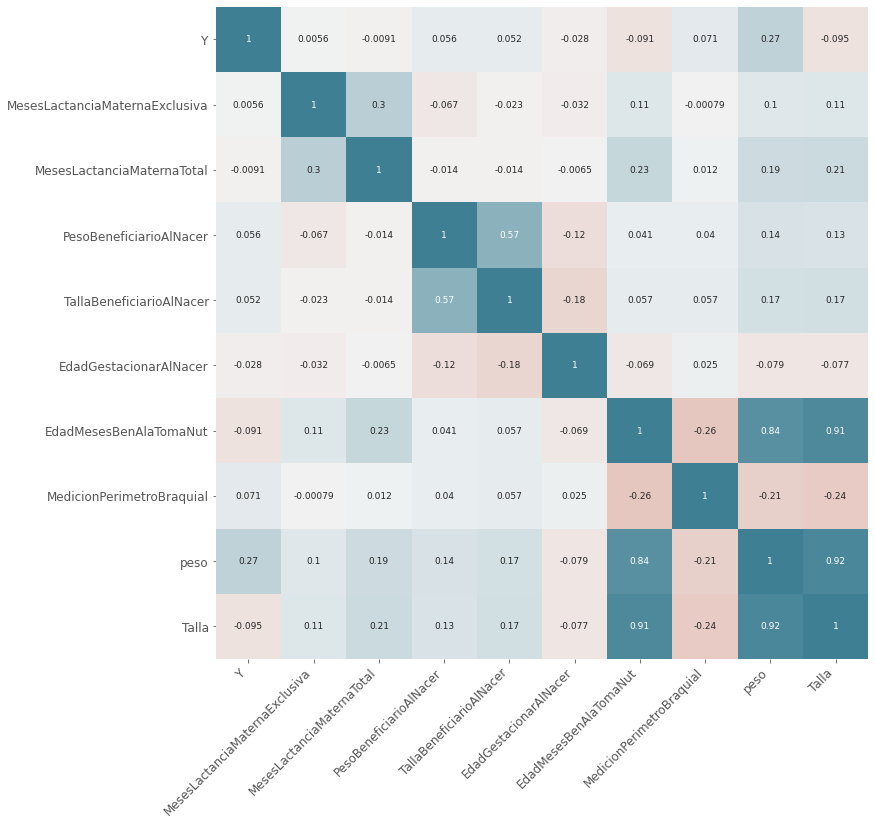

In [0]:
# Correlación entre columnas numéricas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoTalla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# usar función de Correlación entre columnas numéricas
corr_matrix = datos_viz.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 9},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

#### ZScorePesoEdad

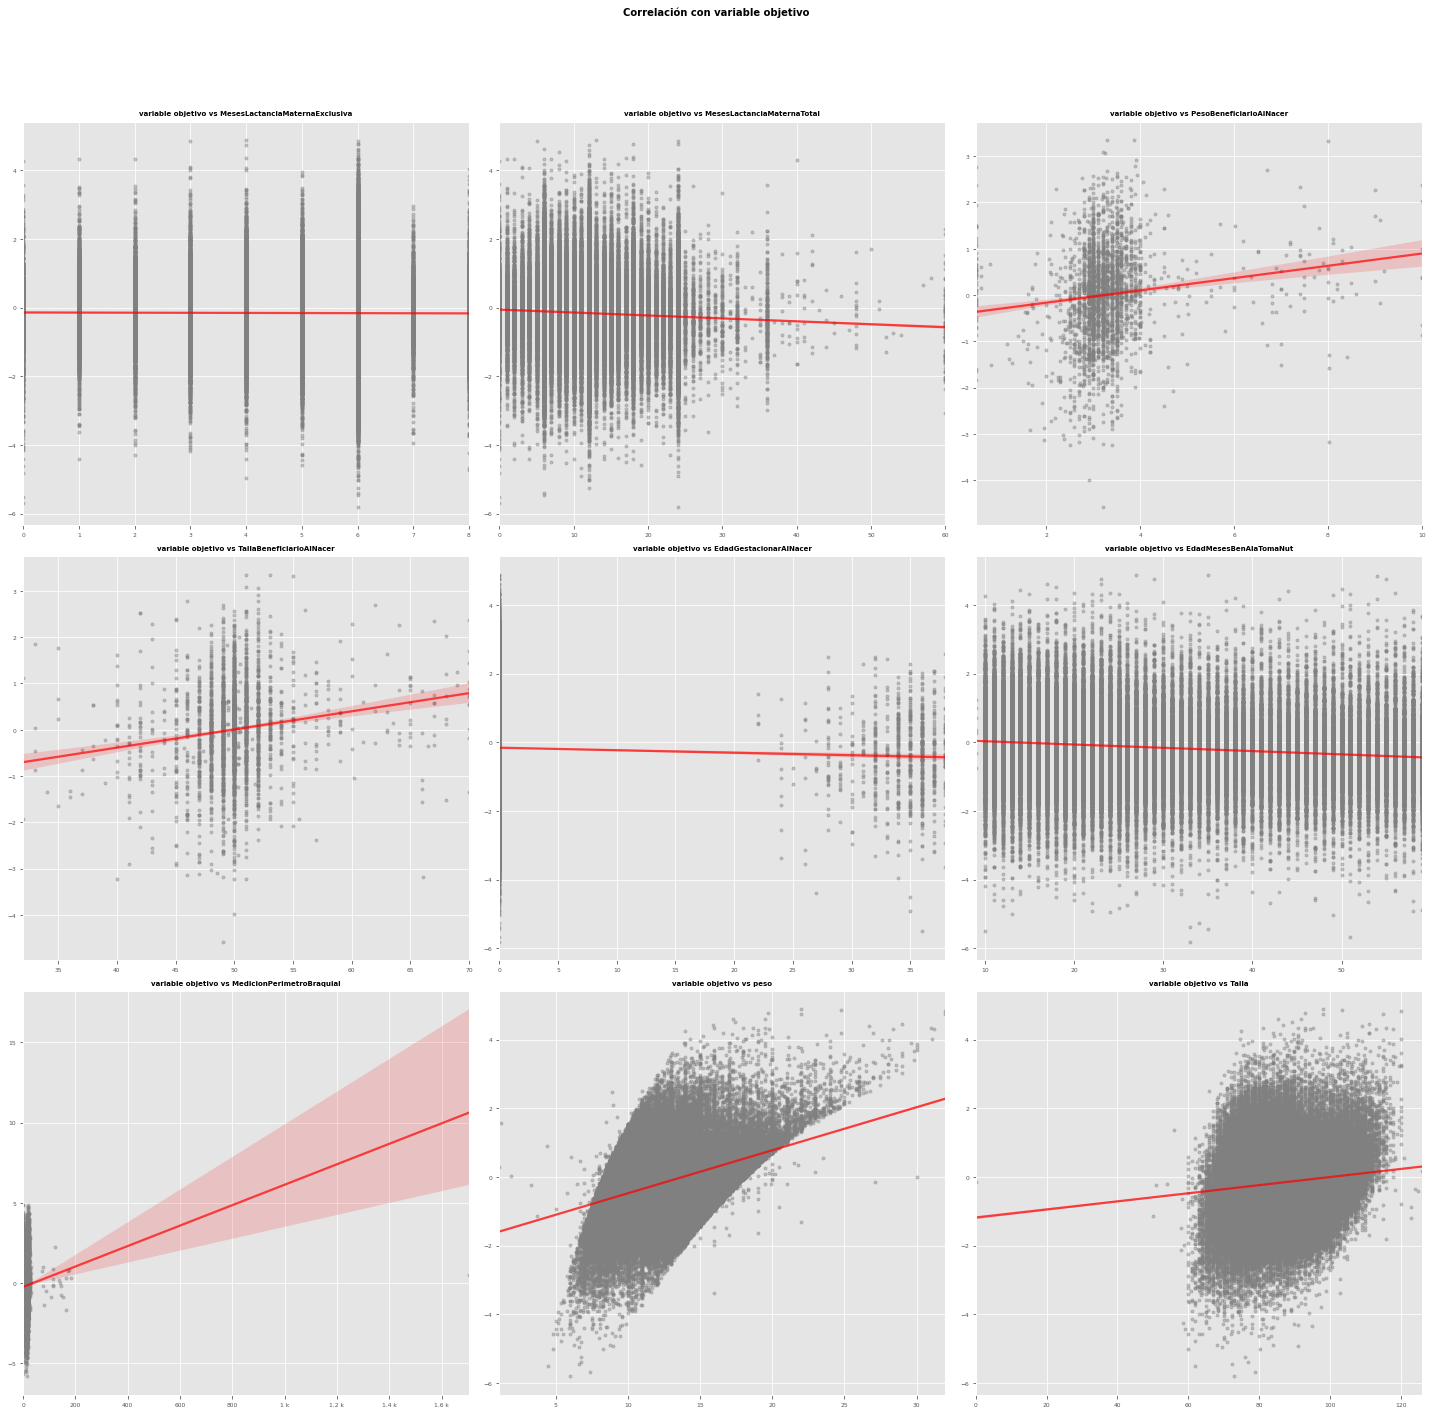

In [0]:
# Gráfico de distribución para cada variable numérica
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoEdad'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_viz.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos_viz[colum],
        y           = datos_viz['Y'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"variable objetivo vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con variable objetivo', fontsize = 10, fontweight = "bold");

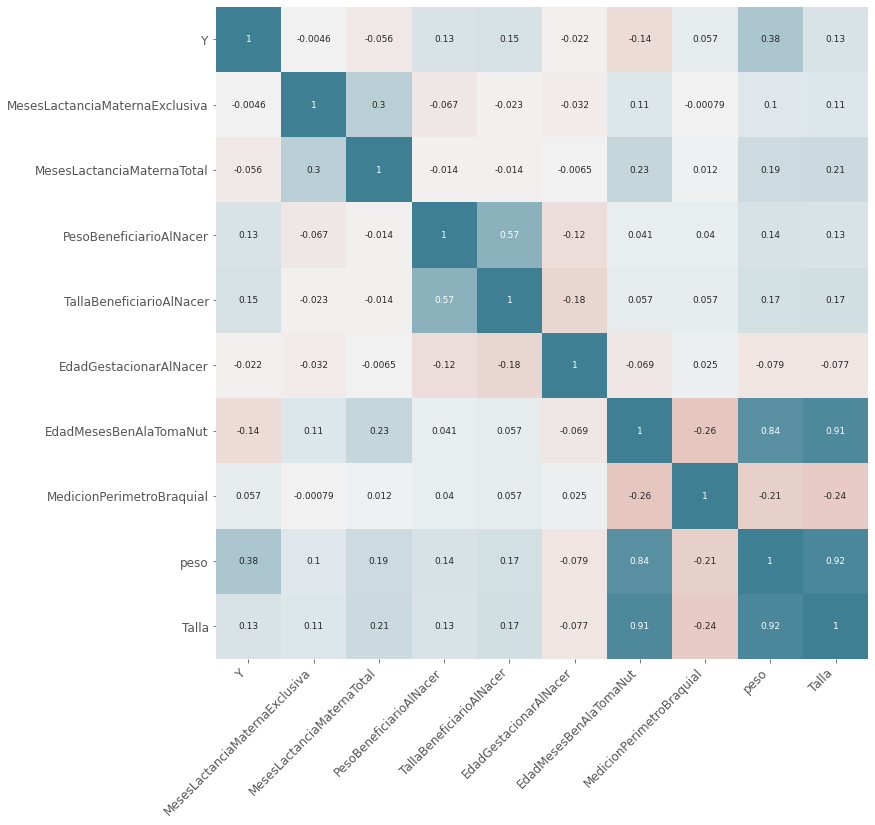

In [0]:
# Correlación entre columnas numéricas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoEdad'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# usar función de Correlación entre columnas numéricas
corr_matrix = datos_viz.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 9},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

#### ZScorePesoTalla

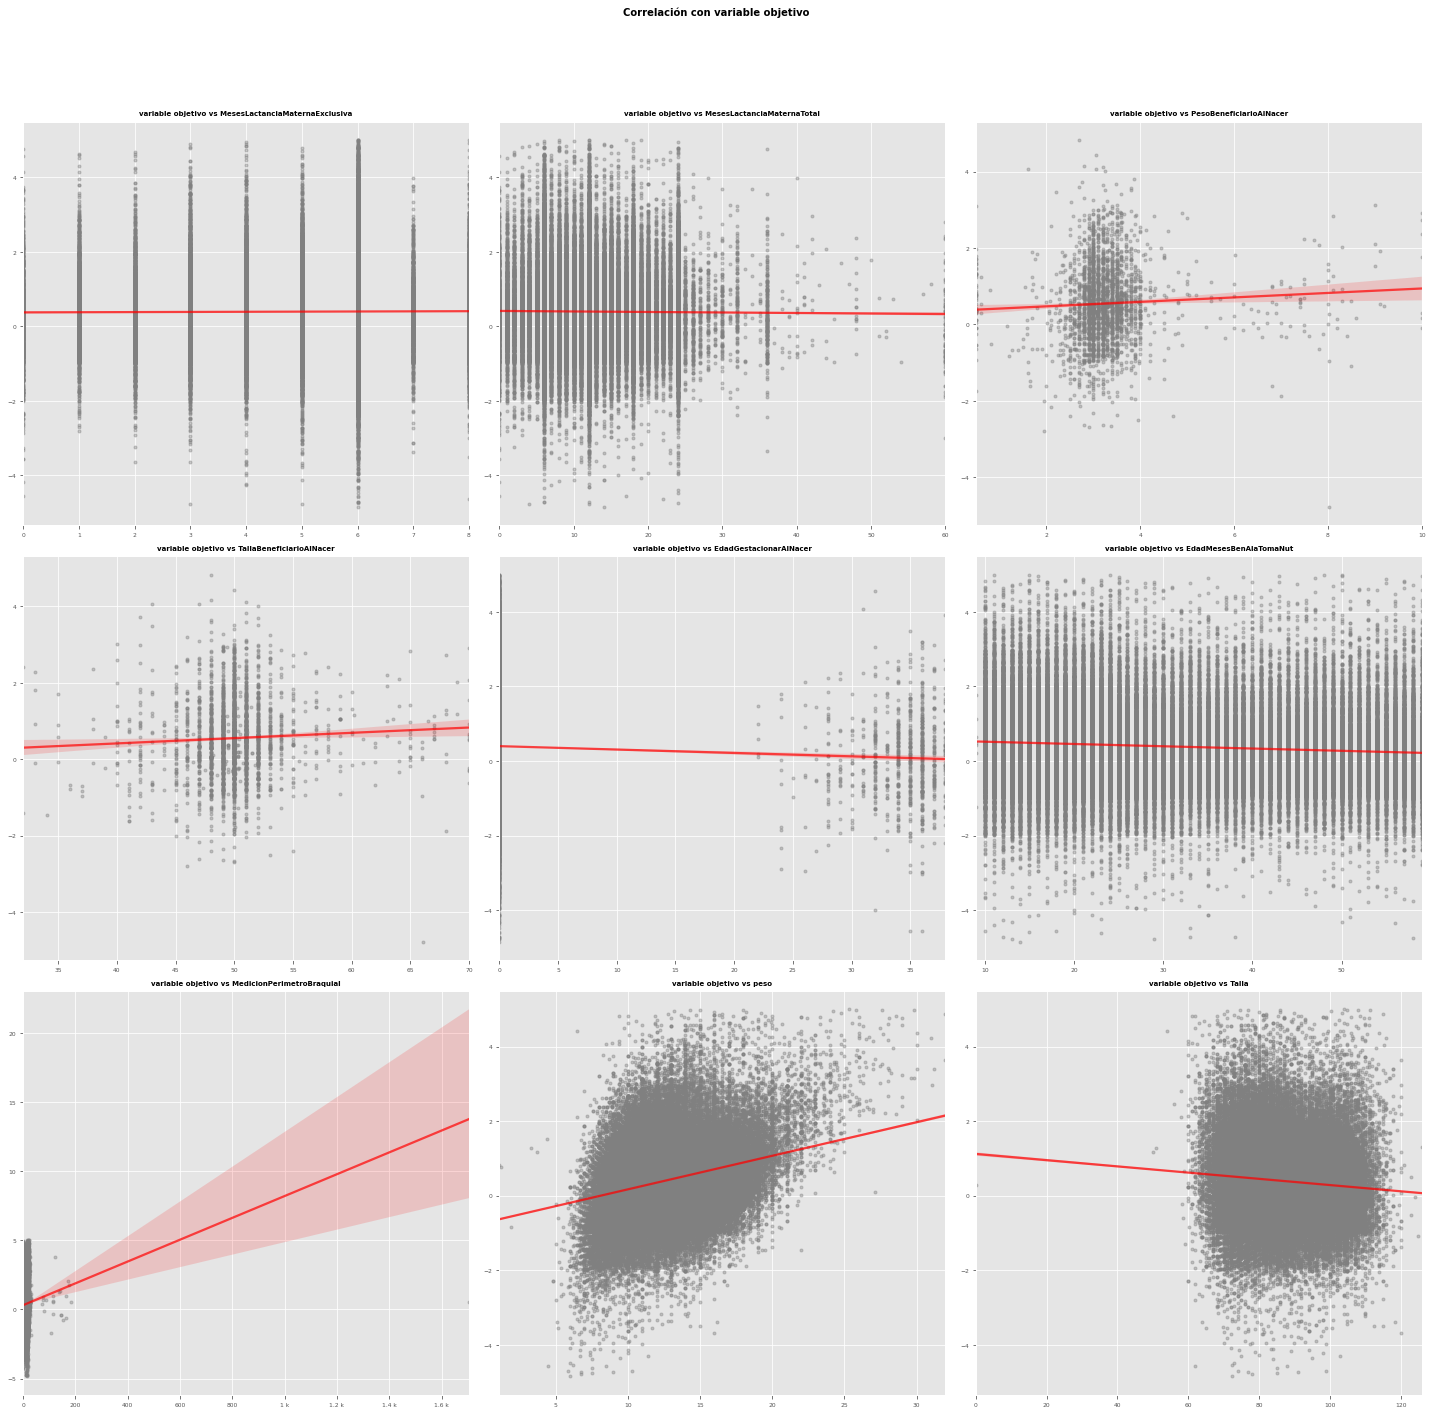

In [0]:
# Gráfico de distribución para cada variable numérica
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoTalla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_viz.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos_viz[colum],
        y           = datos_viz['Y'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"variable objetivo vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con variable objetivo', fontsize = 10, fontweight = "bold");

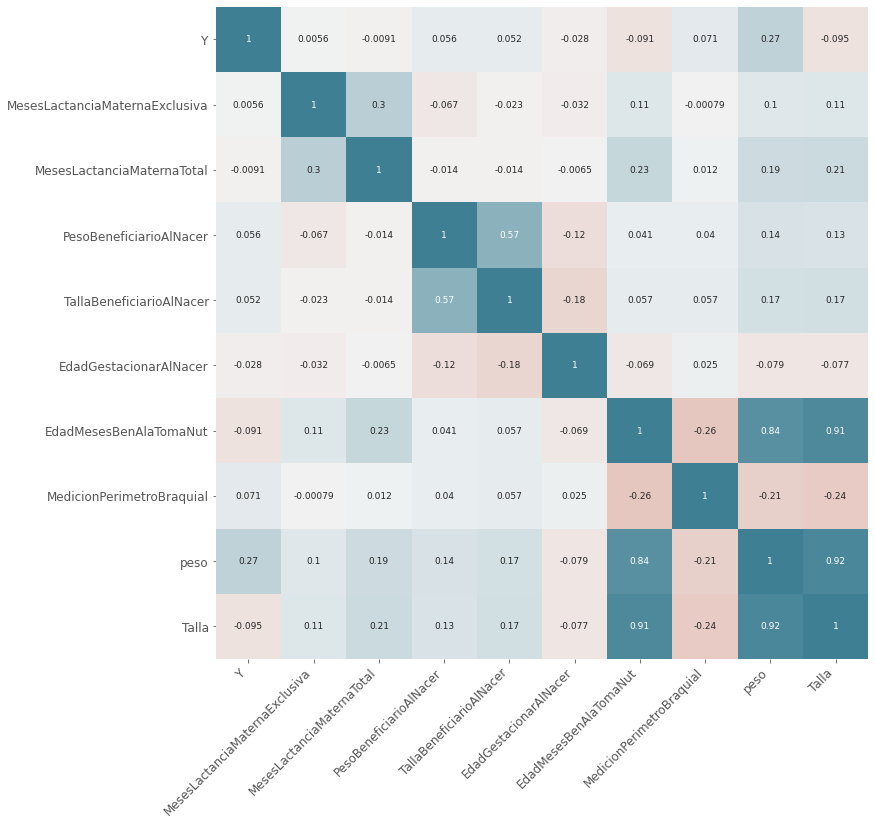

In [0]:
# Correlación entre columnas numéricas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoTalla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# usar función de Correlación entre columnas numéricas
corr_matrix = datos_viz.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 9},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

#### ZScoreIMC

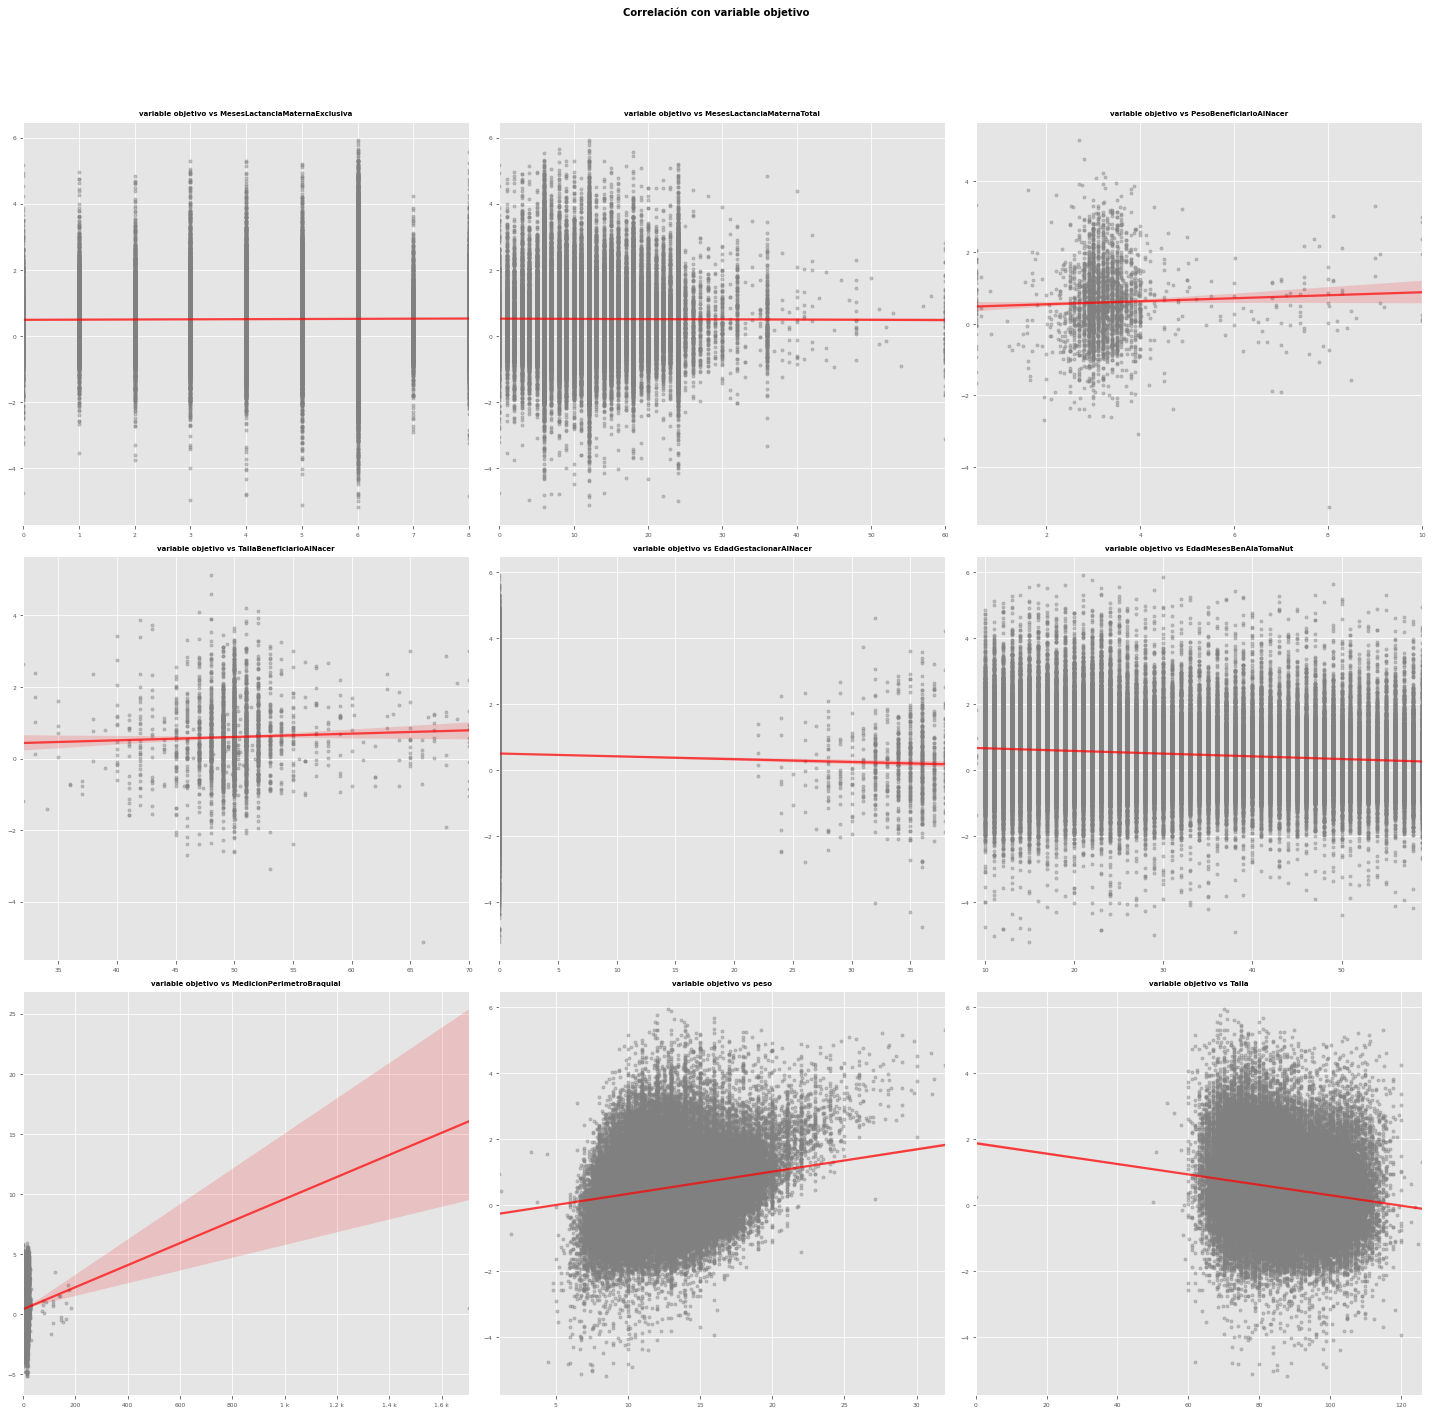

In [0]:
# Gráfico de distribución para cada variable numérica
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScoreIMC'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
axes = axes.flat
columnas_numeric = datos_viz.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Y')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos_viz[colum],
        y           = datos_viz['Y'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"variable objetivo vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con variable objetivo', fontsize = 10, fontweight = "bold");

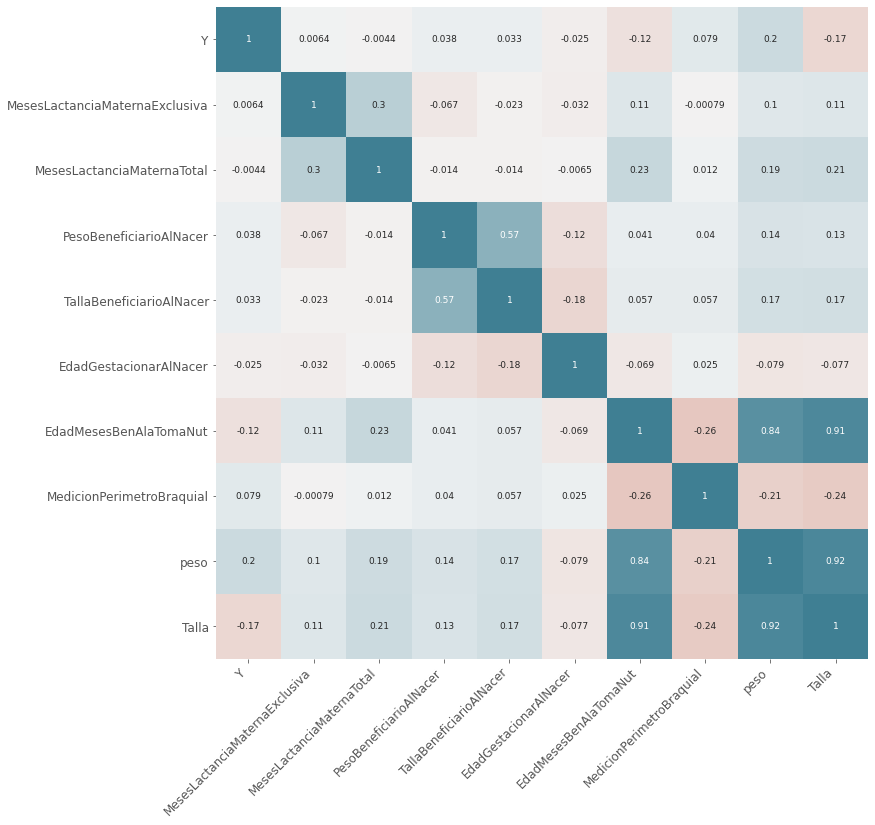

In [0]:
# Correlación entre columnas numéricas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScoreIMC'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]
columnas_numericas = ['Y','MesesLactanciaMaternaExclusiva', 'MesesLactanciaMaternaTotal','PesoBeneficiarioAlNacer', 'TallaBeneficiarioAlNacer','EdadGestacionarAlNacer','EdadMesesBenAlaTomaNut','MedicionPerimetroBraquial','peso','Talla']
datos_viz = datos_viz[columnas_numericas]

# usar función de Correlación entre columnas numéricas
corr_matrix = datos_viz.select_dtypes(include=['float64', 'int']).corr(method='pearson')

# Heatmap matriz de correlaciones

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 9},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 12)

## Variables cualitativas

In [0]:
datos.select_dtypes(include=['object']).describe()

Out[22]:

RegimenSeguridadSocial 
 Toma 
 DireccionICBF 
 NombreServicio 
 FechaNacimientoBeneficiario 
 SemanasBeneficiario 
 tipobeneficiario 
 sexo 
 NombreSexo 
 CodPaisNacimientoBeneficiario 
 NombPaisNacimientoBeneficiario 
 CodPaisRasidenciaBen 
 NombPaisRasidenciaBen 
 CodDepartamentoResidenciaBen 
 NomDepartamentoResidenciaBen 
 CodMunicipResidenciaBen 
 NomMunicipResidenciaBen 
 CodComunaResidenciaBen 
 NomComunaResidenciaBen 
 CodBarrioResidenciaBen 
 NomBarrioResidenciaBen 
 CodVeredaResidenciaBen 
 NomVeredaResidenciaBen 
 NomRancheriaResidenciaBen 
 PresentaDiscapacidad 
 ZonaUbicacionBeneficiario 
 GrupoEtnico 
 AntecendentePremadurez 
 EstadoTallaEdad 
 EstadoPesoEdad 
 EstadoPesoTalla 
 EstadoIMC 
 PresentaCarneVacunacion 
 
 
 
 
 count 
 109725 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 110424 
 110424 
 110425 
 110425 
 110401 
 110401 
 110401 
 110401 
 23903 
 23903 
 23118 
 23118 
 59557 
 59557 
 292 
 193 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 110425 
 
 
 unique 
 4 
 23 
 2 
 9 
 2133 
 1 
 2 
 2 
 2 
 13 
 13 
 2 
 2 
 33 
 33 
 922 
 858 
 592 
 195 
 2006 
 1430 
 5470 
 3346 
 145 
 2 
 2 
 6 
 3 
 3 
 7 
 8 
 6 
 2 
 
 
 top 
 AFILIADO REGIMEN SUBSIDIADO 
 20217 
 Dirección de Primera Infancia 
 DESARROLLO INFANTIL EN MEDIO FAMILIAR SIN ARRI... 
 2019-05-16 
 > 40 Semanas 
 NIÑO O NIÑA ENTRE 6 MESES Y 5 AÑOS Y 11 MESES 
 H 
 Hombre 
 170 
 Colombia 
 170 
 Colombia 
 19 
 Cauca 
 27001 
 Quibdo 
 0800104 
 Sin Informacion 
 OTRO 
 OTRO 
 OTRO 
 OTRO 
 NAZARETH 
 NO 
 RESTO 
 NO SE AUTORECONOCE EN NINGUNO DE LOS ANTERIORES 
 N 
 Talla adecuada para la edad 
 Peso adecuado para la edad 
 Peso adecuado para la talla 
 Adecuado para la edad 
 S 
 
 
 freq 
 92249 
 33583 
 107406 
 45724 
 125 
 110425 
 109908 
 55582 
 55582 
 108686 
 108686 
 110401 
 110401 
 13264 
 13264 
 2934 
 2934 
 1625 
 10509 
 7685 
 7685 
 25140 
 25140 
 16 
 111 
 59559 
 81783 
 56716 
 64260 
 79893 
 80636 
 75300 
 109622

Estado actual de la población medida

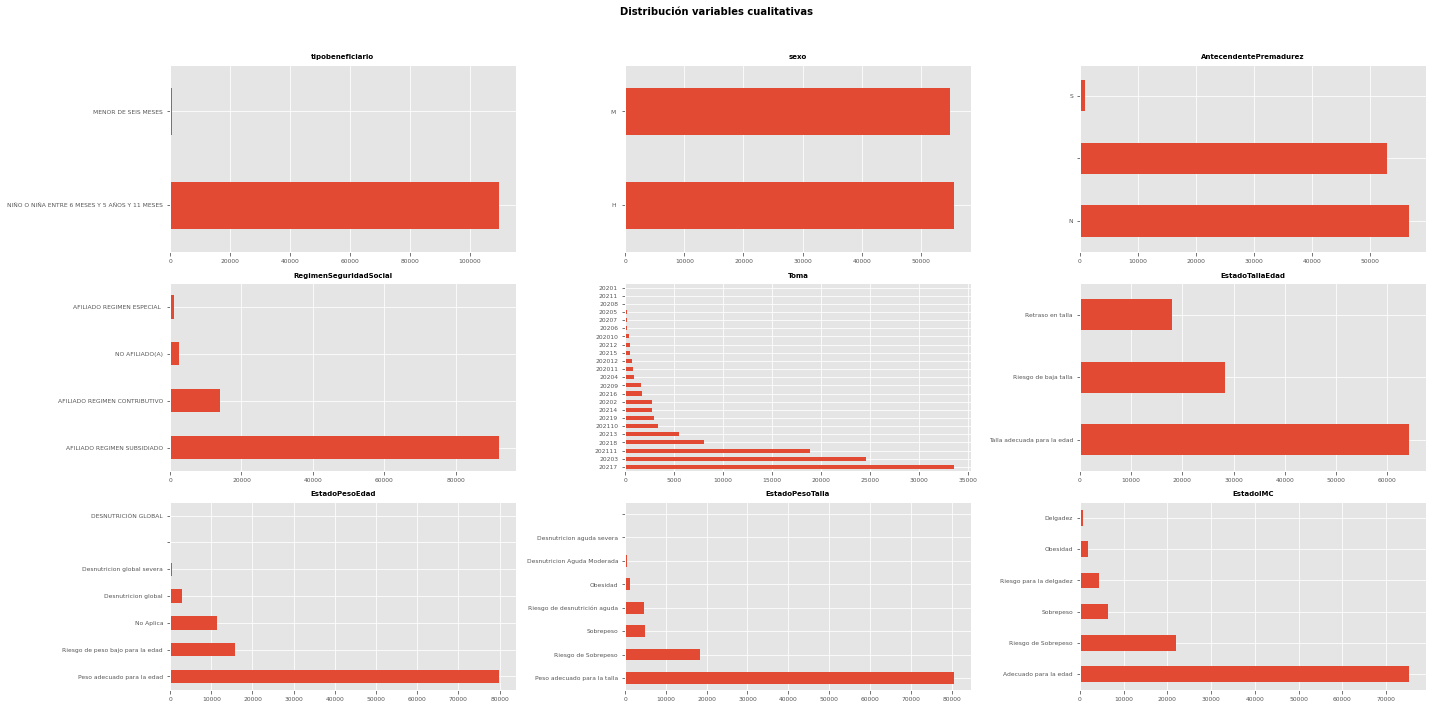

In [0]:
# Gráfico para cada variable cualitativa

# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial','Toma','EstadoTallaEdad','EstadoPesoEdad','EstadoPesoTalla','EstadoIMC']
datos_viz = datos[columnas_viz]
# datos_viz['sexo'].astype(str)
# datos_viz['EdadMesesBenAlaTomaNut'].astype(int)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos_viz[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 10, fontweight = "bold");

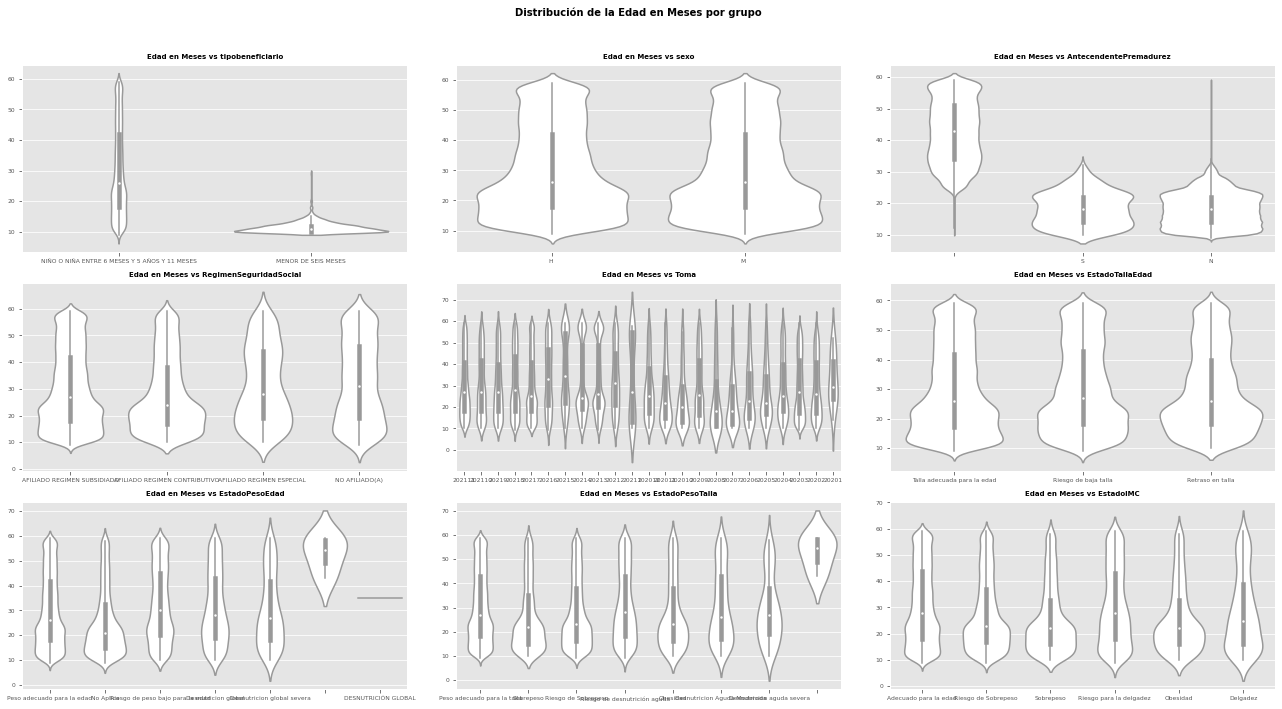

In [0]:
# Gráfico relación entre la Edad en Meses y cada cada variables cualitativas

# preparar dataframe insumo de visualización
columnas_viz = ['EdadMesesBenAlaTomaNut','tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial','Toma','EstadoTallaEdad','EstadoPesoEdad','EstadoPesoTalla','EstadoIMC']
datos_viz = datos[columnas_viz]
datos_viz['EdadMesesBenAlaTomaNut'] = datos_viz['EdadMesesBenAlaTomaNut'].astype(int)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'EdadMesesBenAlaTomaNut',
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"Edad en Meses vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de la Edad en Meses por grupo', fontsize = 10, fontweight = "bold");

## Mediciones (Variable respuesta)

### peso

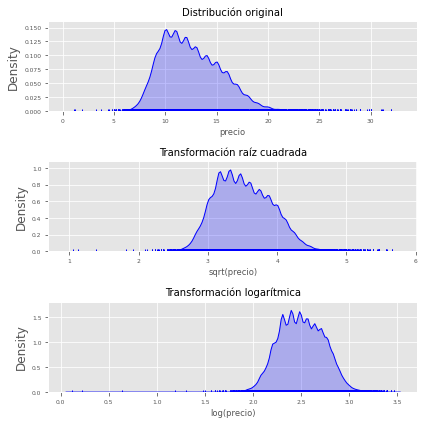

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='peso'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

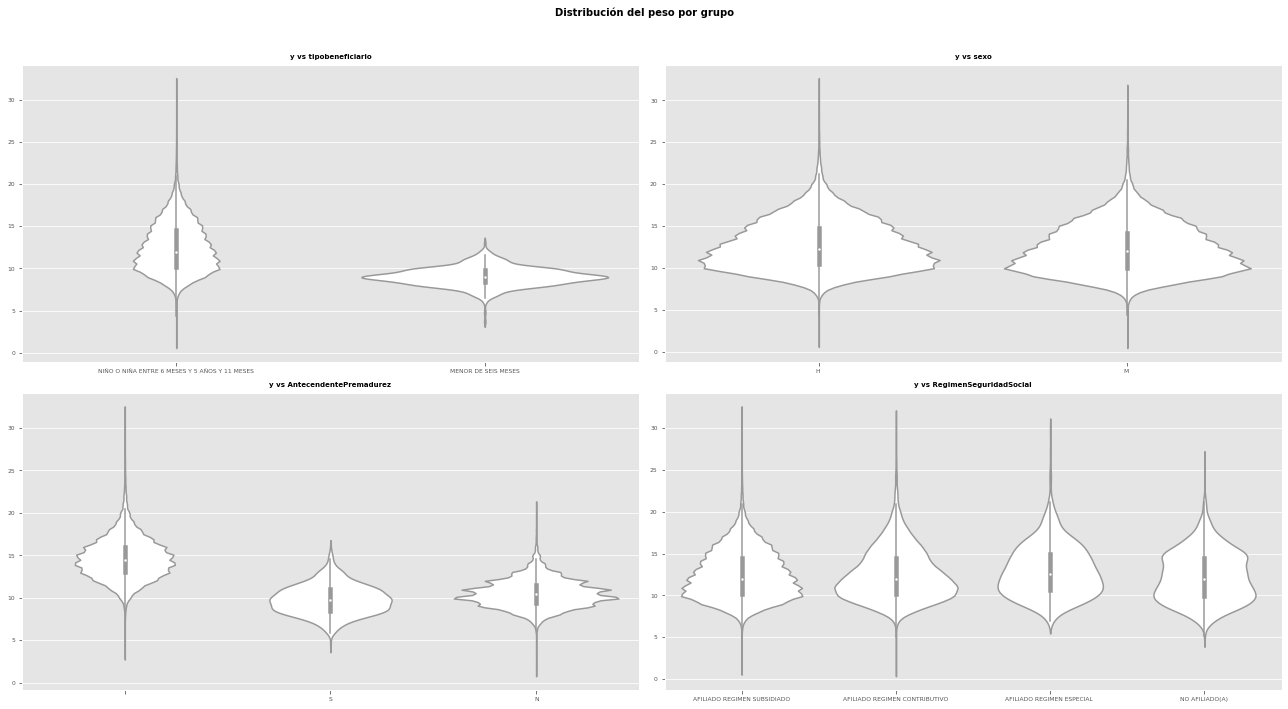

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['peso']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución del peso por grupo', fontsize = 10, fontweight = "bold");

### Talla

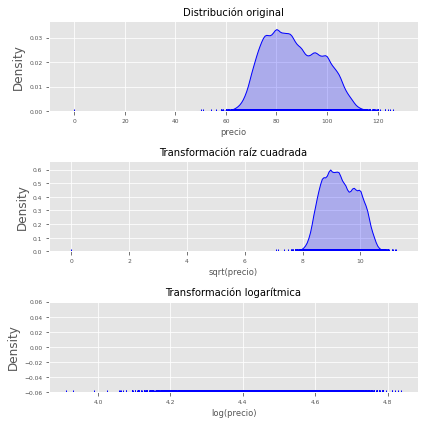

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='Talla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

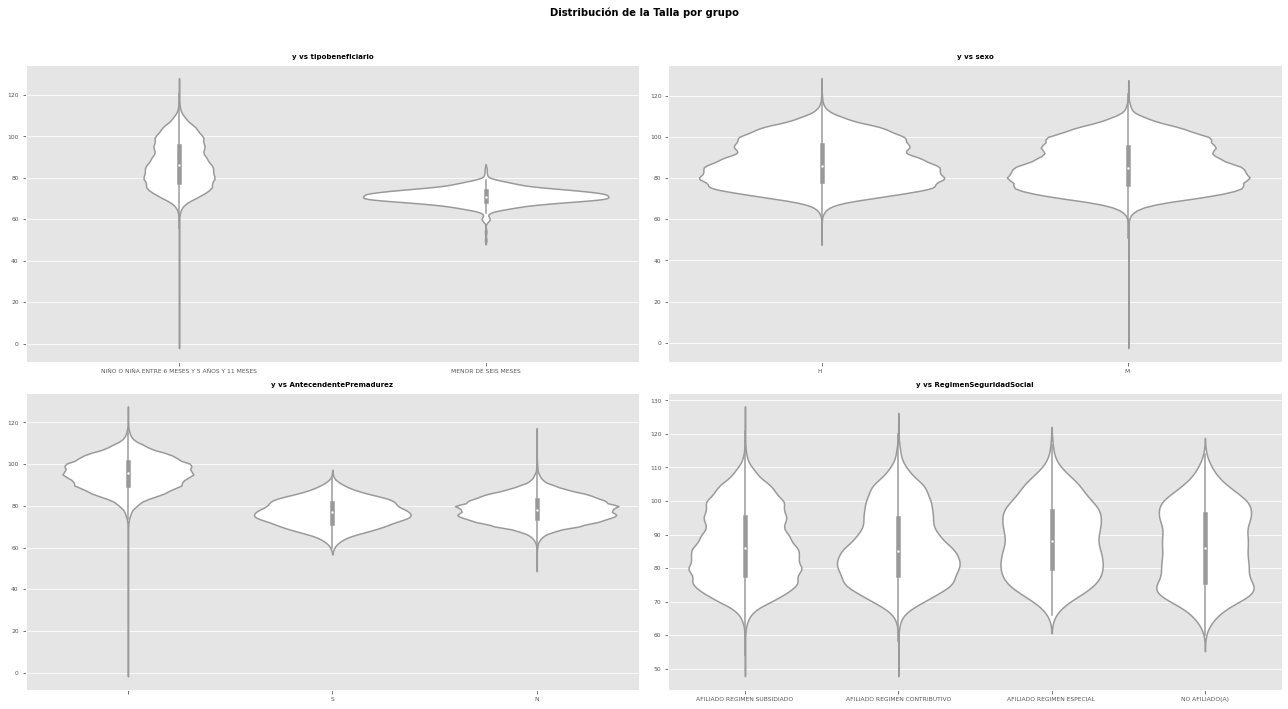

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['Talla']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de la Talla por grupo', fontsize = 10, fontweight = "bold");

### ZScoreTallaEdad

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScoreTallaEdad'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['ZScoreTallaEdad']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de ZScoreTallaEdad por grupo', fontsize = 10, fontweight = "bold");

### ZScorePesoEdad

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoEdad'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['ZScorePesoEdad']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de ZScorePesoEdad por grupo', fontsize = 10, fontweight = "bold");

### ZScorePesoTalla

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScorePesoTalla'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['ZScorePesoTalla']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de ZScorePesoTalla por grupo', fontsize = 10, fontweight = "bold");

### ZScoreIMC

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo ='ZScoreIMC'
datos_viz = datos.copy()
datos_viz['Y'] = datos_viz[variable_objetivo]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos_viz.Y,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos_viz.Y),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [0]:
# Gráfico relación entre la variables de mediciones (objetivo) y cada cada variables cualitativas
# 'peso', 'Talla', 'ZScoreTallaEdad', 'ZScorePesoEdad', 'ZScorePesoTalla','ZScoreIMC'
variable_objetivo = ['ZScoreIMC']


# preparar dataframe insumo de visualización
columnas_viz = ['tipobeneficiario', 'sexo','AntecendentePremadurez','RegimenSeguridadSocial']
datos_viz = datos[columnas_viz+variable_objetivo]
datos_viz[variable_objetivo] = datos_viz[variable_objetivo].astype(float)


# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flat
columnas_object = datos_viz.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = variable_objetivo[0],
        data  = datos_viz,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"y vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución de ZScoreIMC por grupo', fontsize = 10, fontweight = "bold");